In [1]:
#Import Necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Global Terrorism data.
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='iso-8859-1')

C:\Users\rckzs\AppData\Local\Temp\ipykernel_24364\898216134.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='iso-8859-1')


### Data Overview

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [5]:
#Here we can't see all the columns so we set padnas to max.
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[1]+1)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
df.shape

(181691, 135)

In [7]:
# Selecting only necessary columns
df1=df[['provstate', 'region_txt', 'city', 'latitude', 'longitude','country_txt',
         'attacktype1_txt','iyear','imonth','iday','nkill', 'nwound', 'targtype1_txt',
         'gname', 'target1','weaptype1_txt']]

In [8]:
df1.head()

,provstate,region_txt,city,latitude,longitude,country_txt,attacktype1_txt,iyear,imonth,iday,nkill,nwound,targtype1_txt,gname,target1,weaptype1_txt
0,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Dominican Republic,Assassination,1970,7,2,1.0,0.0,Private Citizens & Property,MANO-D,Julio Guzman,Unknown
1,Federal,North America,Mexico city,19.371887,-99.086624,Mexico,Hostage Taking (Kidnapping),1970,0,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,"Nadine Chaval, daughter",Unknown
2,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Philippines,Assassination,1970,1,0,1.0,0.0,Journalists & Media,Unknown,Employee,Unknown
3,Attica,Western Europe,Athens,37.997490,23.762728,Greece,Bombing/Explosion,1970,1,0,NaN,NaN,Government (Diplomatic),Unknown,U.S. Embassy,Explosives
4,Fukouka,East Asia,Fukouka,33.580412,130.396361,Japan,Facility/Infrastructure Attack,1970,1,0,NaN,NaN,Government (Diplomatic),Unknown,U.S. Consulate,Incendiary


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   provstate        181270 non-null  object 
 1   region_txt       181691 non-null  object 
 2   city             181257 non-null  object 
 3   latitude         177135 non-null  float64
 4   longitude        177134 non-null  float64
 5   country_txt      181691 non-null  object 
 6   attacktype1_txt  181691 non-null  object 
 7   iyear            181691 non-null  int64  
 8   imonth           181691 non-null  int64  
 9   iday             181691 non-null  int64  
 10  nkill            171378 non-null  float64
 11  nwound           165380 non-null  float64
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  target1          181055 non-null  object 
 15  weaptype1_txt    181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
mem

In [10]:
#Let's change the name of the column which is more readable.
col={"provstate":"State","region_txt":"Region","city":"City",
         "country_txt":"Country","attacktype1_txt":"Attack_Type",
         "iyear":"Year","imonth":"Month","iday":"Day","nkill":"Killed"
         ,"nwound":"Wounded","targtype1_txt":"Target_Type","gname":"Group_name"
         ,"target1":"Target_Name","weaptype1_txt":"Weap_type"}

In [11]:
df1=df1.rename(columns=col)

In [12]:
df1.head()

,State,Region,City,latitude,longitude,Country,Attack_Type,Year,Month,Day,Killed,Wounded,Target_Type,Group_name,Target_Name,Weap_type
0,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Dominican Republic,Assassination,1970,7,2,1.0,0.0,Private Citizens & Property,MANO-D,Julio Guzman,Unknown
1,Federal,North America,Mexico city,19.371887,-99.086624,Mexico,Hostage Taking (Kidnapping),1970,0,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,"Nadine Chaval, daughter",Unknown
2,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Philippines,Assassination,1970,1,0,1.0,0.0,Journalists & Media,Unknown,Employee,Unknown
3,Attica,Western Europe,Athens,37.997490,23.762728,Greece,Bombing/Explosion,1970,1,0,NaN,NaN,Government (Diplomatic),Unknown,U.S. Embassy,Explosives
4,Fukouka,East Asia,Fukouka,33.580412,130.396361,Japan,Facility/Infrastructure Attack,1970,1,0,NaN,NaN,Government (Diplomatic),Unknown,U.S. Consulate,Incendiary


In [13]:
# Now let's check for null values.
df1.isnull().sum()

State            421
Region             0
City             434
latitude        4556
longitude       4557
Country            0
Attack_Type        0
Year               0
Month              0
Day                0
Killed         10313
Wounded        16311
Target_Type        0
Group_name         0
Target_Name      636
Weap_type          0
dtype: int64

In [14]:
df1=df1.dropna()

In [15]:
#Let's check for null values again.
df1.isnull().sum()

State          0
Region         0
City           0
latitude       0
longitude      0
Country        0
Attack_Type    0
Year           0
Month          0
Day            0
Killed         0
Wounded        0
Target_Type    0
Group_name     0
Target_Name    0
Weap_type      0
dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159570 entries, 1 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   State        159570 non-null  object 
 1   Region       159570 non-null  object 
 2   City         159570 non-null  object 
 3   latitude     159570 non-null  float64
 4   longitude    159570 non-null  float64
 5   Country      159570 non-null  object 
 6   Attack_Type  159570 non-null  object 
 7   Year         159570 non-null  int64  
 8   Month        159570 non-null  int64  
 9   Day          159570 non-null  int64  
 10  Killed       159570 non-null  float64
 11  Wounded      159570 non-null  float64
 12  Target_Type  159570 non-null  object 
 13  Group_name   159570 non-null  object 
 14  Target_Name  159570 non-null  object 
 15  Weap_type    159570 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.7+ MB


In [17]:
# We see that column Killed and Wounded data have dtype float. Let's change the data into integer.
df1['Killed']=df1['Killed'].astype('int64')
df1['Wounded']=df1['Wounded'].astype('int64')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159570 entries, 1 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   State        159570 non-null  object 
 1   Region       159570 non-null  object 
 2   City         159570 non-null  object 
 3   latitude     159570 non-null  float64
 4   longitude    159570 non-null  float64
 5   Country      159570 non-null  object 
 6   Attack_Type  159570 non-null  object 
 7   Year         159570 non-null  int64  
 8   Month        159570 non-null  int64  
 9   Day          159570 non-null  int64  
 10  Killed       159570 non-null  int64  
 11  Wounded      159570 non-null  int64  
 12  Target_Type  159570 non-null  object 
 13  Group_name   159570 non-null  object 
 14  Target_Name  159570 non-null  object 
 15  Weap_type    159570 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 20.7+ MB


In [19]:
df1.describe()

,latitude,longitude,Year,Month,Day,Killed,Wounded
count,159570.000000,1.595700e+05,159570.000000,159570.000000,159570.000000,159570.000000,159570.000000
mean,23.700442,-5.100348e+02,2003.508398,6.487391,15.528000,2.092361,3.199561
std,18.302237,2.157549e+05,12.711726,3.387246,8.802103,9.763436,36.551305
min,-53.154613,-8.618590e+07,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,11.840929,8.663381e+00,1992.000000,4.000000,8.000000,0.000000,0.000000
50%,31.569021,4.378420e+01,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,34.621521,6.914701e+01,2014.000000,9.000000,23.000000,2.000000,2.000000
max,74.633553,1.793667e+02,2017.000000,12.000000,31.000000,1384.000000,8191.000000


In [20]:
df1['Terrorism_Victim']=df1['Killed']+df1['Wounded']
df1['Terrorism_Victim']=df1['Terrorism_Victim'].astype('int64')

In [21]:
df1.head()

,State,Region,City,latitude,longitude,Country,Attack_Type,Year,Month,Day,Killed,Wounded,Target_Type,Group_name,Target_Name,Weap_type,Terrorism_Victim
1,Federal,North America,Mexico city,19.371887,-99.086624,Mexico,Hostage Taking (Kidnapping),1970,0,0,0,0,Government (Diplomatic),23rd of September Communist League,"Nadine Chaval, daughter",Unknown,0
2,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Philippines,Assassination,1970,1,0,1,0,Journalists & Media,Unknown,Employee,Unknown,1
5,Illinois,North America,Cairo,37.005105,-89.176269,United States,Armed Assault,1970,1,1,0,0,Police,Black Nationalists,Cairo Police Headquarters,Firearms,0
6,Montevideo,South America,Montevideo,-34.891151,-56.187214,Uruguay,Assassination,1970,1,2,0,0,Police,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Firearms,0
7,California,North America,Oakland,37.791927,-122.225906,United States,Bombing/Explosion,1970,1,2,0,0,Utilities,Unknown,Edes Substation,Explosives,0


In [22]:
Victim_Region=df1[['Region','Terrorism_Victim']]

In [23]:
Victim_Region=Victim_Region.groupby(by=['Region']).sum().reset_index()

In [24]:
Victim_Region.head()

,Region,Terrorism_Victim
0,Australasia & Oceania,369
1,Central America & Caribbean,30064
2,Central Asia,2657
3,East Asia,9814
4,Eastern Europe,17927


In [25]:
#Let's set the value from largest to smallest.
Victim_Region=Victim_Region.sort_values(by=['Terrorism_Victim'],ascending=False)

In [26]:
Victim_Region.head()

,Region,Terrorism_Victim
5,Middle East & North Africa,324218
8,South Asia,229455
10,Sub-Saharan Africa,104242
7,South America,40639
9,Southeast Asia,36332


## Data Visualization

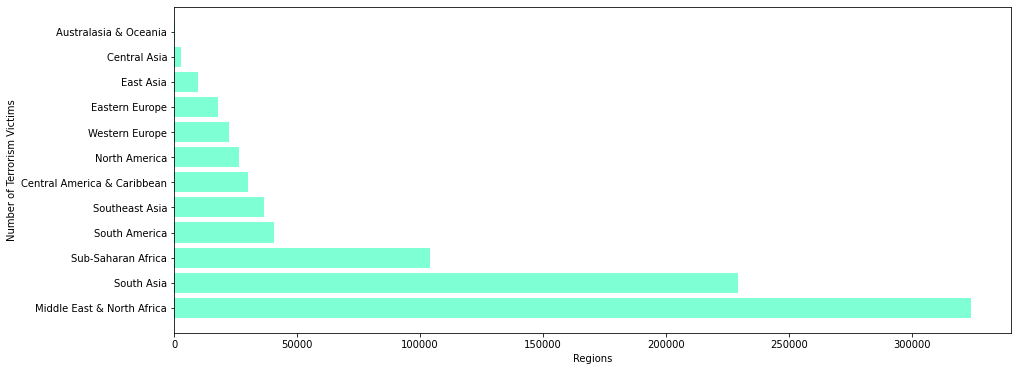

In [27]:
plt.subplots(figsize=(15,6))
plt.barh(Victim_Region['Region'],Victim_Region['Terrorism_Victim'],color="Aquamarine")
plt.xlabel('Regions')
plt.ylabel('Number of Terrorism Victims')
plt.show()

We can see that **Middle East & North Africa** has the most Terrorism Victims.

In [28]:
Victim_Country=df1[['Country','Terrorism_Victim']]

In [29]:
Victim_Country=Victim_Country.groupby(by=['Country']).sum().reset_index()

In [30]:
Victim_Country.head()

,Country,Terrorism_Victim
0,Afghanistan,79446
1,Albania,152
2,Algeria,17885
3,Angola,4040
4,Argentina,1134


In [31]:
Victim_Country=Victim_Country.sort_values(by=['Terrorism_Victim'],ascending=False)

In [32]:
Victim_Country.head()

,Country,Terrorism_Victim
81,Iraq,201336
0,Afghanistan,79446
131,Pakistan,63725
77,India,45823
164,Sri Lanka,28649


In [33]:
Victim_Country=Victim_Country.head(20)

In [34]:
Victim_Country

,Country,Terrorism_Victim
81,Iraq,201336
0,Afghanistan,79446
131,Pakistan,63725
77,India,45823
164,Sri Lanka,28649
186,United States,24450
33,Colombia,22637
127,Nigeria,21680
172,Syria,21474
137,Philippines,19634


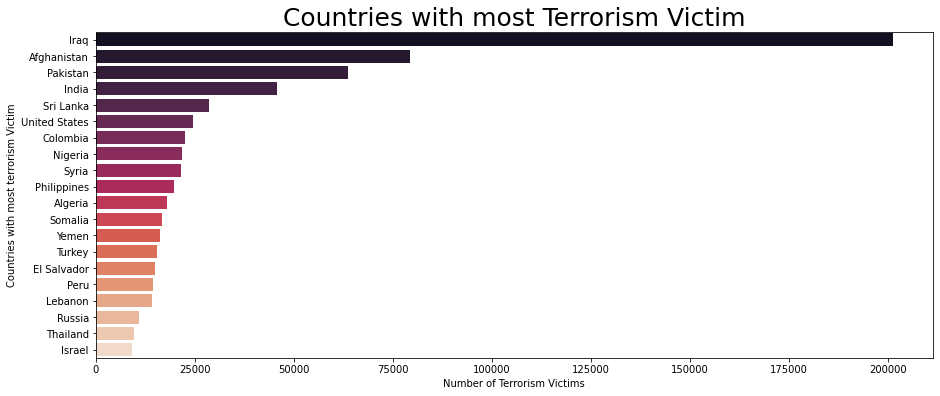

In [35]:
plt.subplots(figsize=(15,6))
plt.title('Countries with most Terrorism Victim',fontsize=25)
sns.barplot(y="Country",x="Terrorism_Victim",data=Victim_Country,palette="rocket")
plt.xlabel('Number of Terrorism Victims')
plt.ylabel('Countries with most terrorism Victim')
plt.show()

In [36]:
#Time VS Terrorism
tt=df1[['Year','Terrorism_Victim']]

In [37]:
tt=tt.groupby(by=['Year']).sum().reset_index()

In [38]:
tt=tt.tail(18)
tt

,Year,Terrorism_Victim
29,2000,8761
30,2001,29142
31,2002,10253
32,2003,10020
33,2004,16750
34,2005,17815
35,2006,23194
36,2007,33487
37,2008,26344
38,2009,26604


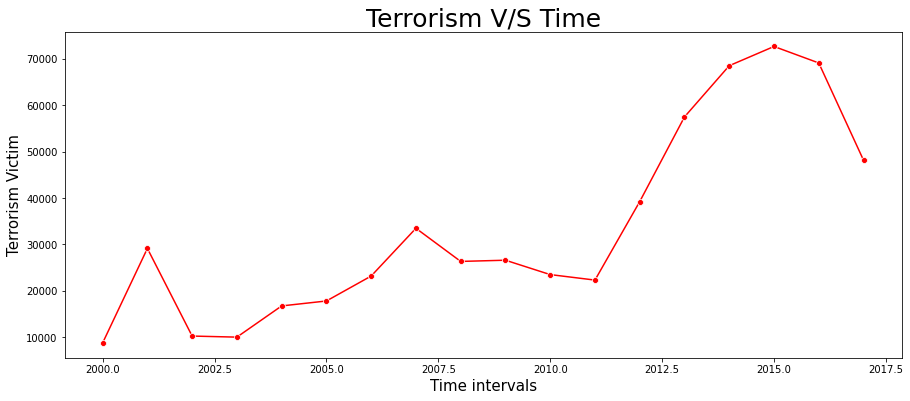

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Year",y="Terrorism_Victim",data=tt,marker="o",color="red")
plt.xlabel('Time intervals',size=15)
plt.ylabel('Terrorism Victim',size=15)
plt.title("Terrorism V/S Time",fontsize=25)
plt.show()

In [40]:
# We want to know which group has been most involved in the terrorism activities. So let's create a dataframe with those data. 
tg=df1[['Group_name','Terrorism_Victim']]
tg.head()

,Group_name,Terrorism_Victim
1,23rd of September Communist League,0
2,Unknown,1
5,Black Nationalists,0
6,Tupamaros (Uruguay),0
7,Unknown,0


In [41]:
tg=tg.groupby(by=['Group_name']).sum().reset_index()
tg.head()

,Group_name,Terrorism_Victim
0,1 May,1
1,14 K Triad,0
2,14 March Coalition,85
3,14th of December Command,0
4,15th of September Liberation Legion,1


In [42]:
tg=tg.sort_values(by=['Terrorism_Victim'],ascending=False)

In [43]:
tg.head()

,Group_name,Terrorism_Victim
3153,Unknown,305996
1420,Islamic State of Iraq and the Levant (ISIL),58134
2903,Taliban,54160
150,Al-Qaida,28340
659,Boko Haram,20247


In [44]:
tg.drop([3153],axis=0,inplace=True)

In [45]:
tg=tg.head(8)

In [46]:
tg

,Group_name,Terrorism_Victim
1420,Islamic State of Iraq and the Levant (ISIL),58134
2903,Taliban,54160
150,Al-Qaida,28340
659,Boko Haram,20247
1729,Liberation Tigers of Tamil Eelam (LTTE),20242
2930,Tehrik-i-Taliban Pakistan (TTP),15305
166,Al-Shabaab,14515
154,Al-Qaida in Iraq,14327


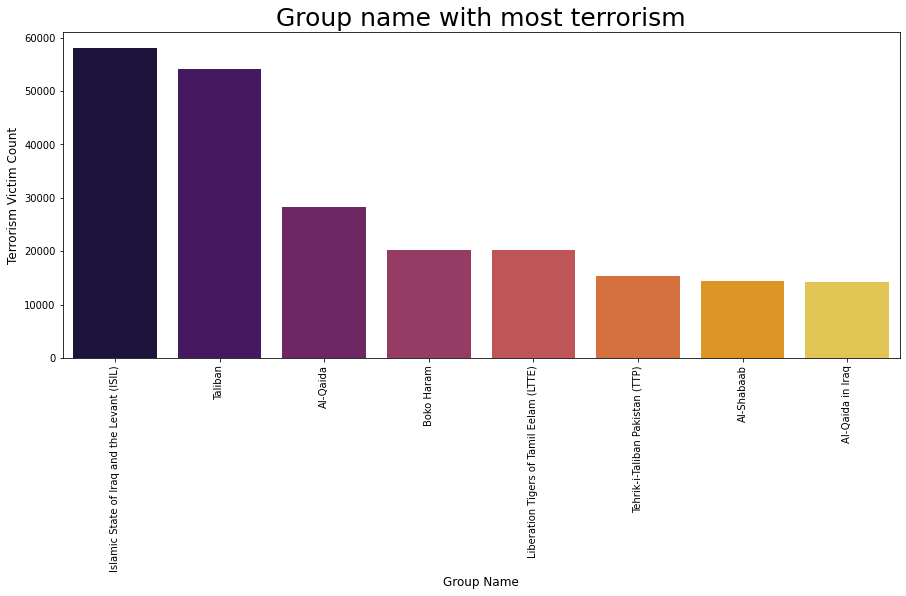

In [47]:
plt.figure(figsize=(15,6))
plt.title('Group name with most terrorism',fontsize=25)
sns.barplot(data=tg,x="Group_name",y="Terrorism_Victim",palette="inferno")
plt.xlabel('Group Name',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Terrorism Victim Count',fontsize=12)
plt.show()

## From the Analysis

- The hotzone for terrorism are:<br>
    1. Middle East & North Africa
	2. South Asia
	3. Sub-Saharan Africa	
	4. South America	
	5. Southeast Asia
- The country with the most terrorist attack is Iraq with 201336 terrorism victims.<br>
- From the Terrorism vs Time graph, there was a huge inclination of terrorism after 2010 and decline after 2015.<br>
- In last 5 decades ISIL and Taliban has been the terrorist group most involved.
